##      **Using Keras in python to work on a classification dataset**

# Downloading the Dataset
First, we need to install the Kaggle API and authenticate it to download the "Traffic Sign Detection" dataset.

**Description :-** This script installs the kaggle package, then uses the files module from google.colab to upload the kaggle.json file containing Kaggle API credentials. It creates a .kaggle directory to store this file, copies the uploaded file to this directory, and sets the file permissions to ensure only you can read and write it for security purposes.

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


**Decription :-** The first command downloads the "Traffic Sign Dataset Classification" dataset from Kaggle. The second command unzips the downloaded dataset file into a directory named traffic_sign_dataset.

In [2]:
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification
!unzip traffic-sign-dataset-classification.zip -d traffic_sign_dataset

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0040.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0041.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0042.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0043.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0044.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0045.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0046.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0047.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0048.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/24/024_1_0049.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/25/025_0001.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/25/025_1_0001.png  
  inflating: traffic_sign_dataset/traffic_Data/DATA/26/026_0001.png  
  inflating: traf

# Creating CSV files for train and test dataset :-

we are pre-processing the data and creating train_data.csv and test_data.csv file with columns image_path and label for further processing:-

**Decription :-**  
- **Line 1- 2 :-** Imports the **os** library for file system operations and **pandas** for data manipulation.
- **Line 3 :-** Defines the directory path where the training images are stored.
- **Line 4-5 :-** Creates empty lists to store image paths and their corresponding labels.
- **Line 6-8 :-** Iterates over each label directory inside the main training directory.
- **Line 9-13 :-** Iterates over each image file within the label directory, checks if the file is an image (.jpg or .png), and stores its path and label.
- **Line 14-15 :-** Creates a dictionary with image paths and labels, then converts it into a DataFrame.
- **Line 16-17 :-** Defines the path for the CSV file and saves the DataFrame to this file without including the index.
- **Line 18 :-** Prints a message confirming that the CSV file was saved successfully.


In [3]:
import os
import pandas as pd

train_dir = '/content/traffic_sign_dataset/traffic_Data/DATA'

image_paths = []
labels = []

for label in os.listdir(train_dir):
    label_dir = os.path.join(train_dir, label)
    if os.path.isdir(label_dir):
        for image_name in os.listdir(label_dir):
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image_path = os.path.join(label_dir, image_name)
                image_paths.append(image_path)
                labels.append(label)

data = {'Image_Path': image_paths, 'Label': labels}
df = pd.DataFrame(data)

csv_file_path = '/content/traffic_sign_dataset/traffic_Data/train_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV train file saved successfully!")

CSV train file saved successfully!


In [4]:
import os
import pandas as pd

test_folder = '/content/traffic_sign_dataset/traffic_Data/TEST'

image_paths = []
labels = []

# Iterate through each image file in the test folder
for image_name in os.listdir(test_folder):
    if image_name.endswith('.jpg') or image_name.endswith('.png'):
        image_path = os.path.join(test_folder, image_name)
        image_paths.append(image_path)
        labels.append('Unknown')

df = pd.DataFrame({'Image_Path': image_paths, 'Label': labels})

csv_file_path = '/content/traffic_sign_dataset/traffic_Data/test_data.csv'
df.to_csv(csv_file_path, index=False)

print("CSV test file saved successfully!")

CSV test file saved successfully!


# Importing Libraries :-

**Description :-**  
- **os:** Importing os module provides functions to interact with the operating system (e.g., reading files, navigating directories).
- **pandas (as pd):** A data manipulation and analysis library, useful for handling structured data.
- **numpy (as np):** A library for numerical computations, providing support for arrays and mathematical operations.
- **seaborn (as sns):** A data visualization library based on matplotlib, used for creating attractive and informative statistical graphics.
- **matplotlib.pyplot (as plt):** A plotting library for creating static, interactive, and animated visualizations in Python.
- **keras.preprocessing.image.ImageDataGenerator:** A Keras utility for generating batches of tensor image data with real-time data augmentation.
- **keras.applications.Xception:** Pre-trained deep learning models from Keras that can be used for transfer learning or feature extraction.
- **keras.layers:** Provides a variety of neural network layers that can be used to build models.
- **keras.models:** Used to define and work with models, including creating sequential or functional models.
- **keras.optimizers:** Provides various optimization algorithms for training neural networks (e.g., SGD, Adam).



In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception
from keras import layers, models, optimizers
from keras import Sequential
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.callbacks import EarlyStopping


# Creating Data Generators for Image Classification

- **Import Libraries:** Imports train_test_split for splitting data and pandas for data manipulation.
- **Read CSV File:** Reads the CSV file into a DataFrame df.
- **Convert 'Label' Column to String:** Ensures the 'Label' column is treated as string data.
- **Manual Stratified Split:** Splits each class subset into training and validation sets, ensuring all classes are present in both.
- **Concatenate Splits:** Combines all class splits to form the final training and validation DataFrames.
- **Check Data Types and Number of Classes:** Verifies the data type of the 'Label' column and prints the total number of unique classes.
- **Check Number of Classes in Each Set:** Ensures both training and validation sets contain all classes.

In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/traffic_sign_dataset/traffic_Data/train_data.csv')

# Convert the 'Label' column to a categorical data type
df['Label'] = df['Label'].astype('str')

# Perform stratified split manually to ensure all classes are present in both sets
train_list = []
val_list = []

for label in df['Label'].unique():
    class_subset = df[df['Label'] == label]
    train_class, val_class = train_test_split(class_subset, test_size=0.2, random_state=42)
    train_list.append(train_class)
    val_list.append(val_class)

# Concatenate all class splits to form the final train and validation DataFrames
train_df = pd.concat(train_list).reset_index(drop=True)
val_df = pd.concat(val_list).reset_index(drop=True)

# Check the data type of the 'Label' column in the train and validation DataFrames
print(train_df['Label'].dtype)
print(val_df['Label'].dtype)
num_classes = len(df['Label'].unique())
print(num_classes)

# Check the number of classes in each set
print("Training set classes:", len(train_df['Label'].unique()))
print("Validation set classes:", len(val_df['Label'].unique()))

object
object
58
Training set classes: 58
Validation set classes: 58


**Description :-**
- **Image Data Generators Setup:** train_datagen and val_datagen are defined with specific image preprocessing configurations like rescaling, shearing, zooming, flipping, rotation, and shifting.

- **Batch Size and Target Size Setup:**
  - **batch_size** is set to 32, indicating the number of samples per batch during training.
  - **target_size** is set to (224, 224), specifying the desired dimensions for input images.

- **Train and Validation Data Generators:**
  - **train_generator** and **validation_generator** are created using **flow_from_dataframe method**, which generates batches of augmented images and their corresponding labels.
  - The DataFrame (**train_df** and **val_df**) provides the paths to the images (**x_col='Image_Path'**) and their labels (**y_col='Label'**).
  - **class_mode** is set to 'categorical' since the labels are in categorical format.

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2
)
val_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
target_size = (224, 224)
print (num_classes)

58


In [8]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    x_col='Image_Path',
                                                    y_col='Label',
                                                    target_size=target_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(dataframe=val_df,
                                                        x_col='Image_Path',
                                                        y_col='Label',
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode='categorical')
print (num_classes)

Found 3313 validated image filenames belonging to 58 classes.
Found 857 validated image filenames belonging to 58 classes.
58


# Exploratory Data Analysis
**Description :-**
- **Read CSV:** Load label information from a CSV file into a dataframe (labels_df).
- **Create Dictionary:** Convert labels_df to a dictionary (label_to_int) mapping string labels to integer labels.
- **Map Labels:** Add a new column (Label_Int) to train_df by mapping string labels to integers using label_to_int.
- **Visualize Distribution:** Generate a bar chart showing the distribution of integer labels in train_df.

In [9]:
# Understand the dataset
print(train_df.head())
print(train_df.shape)
print(train_df.info())
print(train_df.describe())

                                          Image_Path Label
0  /content/traffic_sign_dataset/traffic_Data/DAT...    30
1  /content/traffic_sign_dataset/traffic_Data/DAT...    30
2  /content/traffic_sign_dataset/traffic_Data/DAT...    30
3  /content/traffic_sign_dataset/traffic_Data/DAT...    30
4  /content/traffic_sign_dataset/traffic_Data/DAT...    30
(3313, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Image_Path  3313 non-null   object
 1   Label       3313 non-null   object
dtypes: object(2)
memory usage: 51.9+ KB
None
                                               Image_Path Label
count                                                3313  3313
unique                                               3313    58
top     /content/traffic_sign_dataset/traffic_Data/DAT...    28
freq                                                    1   356


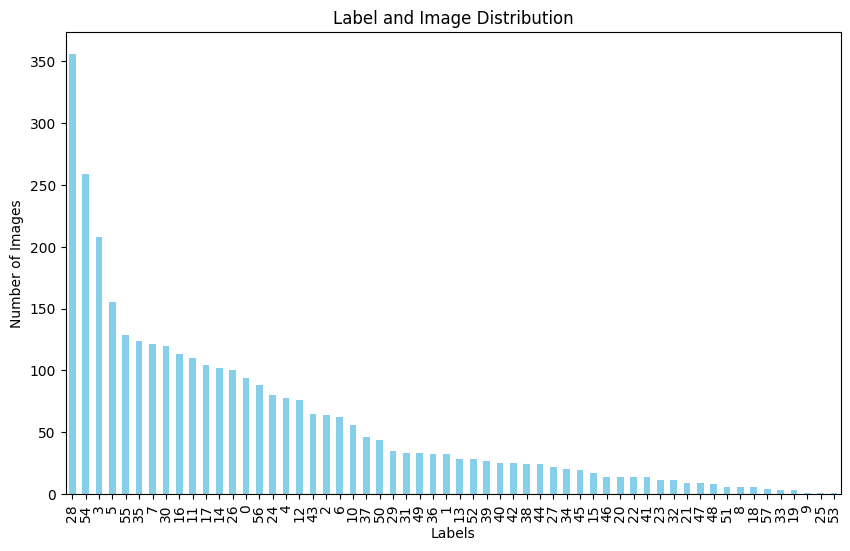

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of images for each label
label_counts = train_df['Label'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar', color='skyblue')

# Add titles and labels
plt.title('Label and Image Distribution')
plt.xlabel('Labels')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)

# Show the plot
plt.show()


 # Customizing it according to our usecase
**Description :-**
- **Unfreeze Base Model:** Sets the base model to be trainable.
- **Initialize Sequential Model:** Starts creating a sequential model.
- **Add Base Model:** Incorporates a pre-trained model for feature extraction.
- **Global Average Pooling:** Reduces the spatial dimensions to a single value per feature map.
- **Dense Layer 1:** Adds a fully connected layer with 512 units and ReLU activation.
- **Dropout Layer 1:** Includes a dropout layer to prevent overfitting with a 50% rate.
- **Dense Layer 2:** Adds another fully connected layer with 256 units and ReLU activation.
- **Dropout Layer 2:** Includes another dropout layer with a 50% rate to further prevent overfitting.
- **Output Layer:** Adds a final fully connected layer with a number of units equal to the number of classes and softmax activation to produce class probabilities.
- **Return Model:** Returns the constructed model.

In [20]:
def create_model(base_model, input_shape, num_classes):
    base_model.trainable = True  # Unfreeze the base model
    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

**Description :-**
- **Compile Model:** Configures the model with the Adam optimizer, categorical cross-entropy loss, and accuracy metric.
- **Early Stopping Callback:** Sets up early stopping to monitor validation loss, stop training if no improvement after 5 epochs, and restore the best model weights.
- **Train Model:** Trains the model using the training data, validates with the validation data, specifies the number of epochs, and uses the early stopping callback.
- **Evaluate Model:** Extracts the final validation accuracy from the training history and prints it.
- **Plot Training History:** Plots the accuracy and validation accuracy over the epochs to visualize the training progress.
- **Return History:** Returns the training history for further analysis.
- **Create Save Directory:** Checks if the directory for saving models exists, and creates it if it doesn't.


In [21]:
def train_and_evaluate(model, train_data, val_data, model_name, epochs=10):
  # Compile the model
  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  # Early stopping callback
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

  # Train the model with the specified number of epochs
  history = model.fit(train_generator,
                      validation_data=validation_generator,
                      steps_per_epoch=len(train_generator),
                      epochs=epochs,
                      callbacks=[early_stopping])

  # Evaluate the model
  val_accuracy = history.history['val_accuracy'][-1]
  print(f'{model_name} Validation Accuracy: {val_accuracy:.4f}')

  # Plot training history
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0, 1])
  plt.legend
  plt.legend(loc='lower right')
  plt.title(f'{model_name} Accuracy')
  plt.show()

  return history


In [22]:
save_dir = 'saved_models'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Loading the Base-Model
**Description :-**
- **Initialize Base Model:** Loads the Xception model pre-trained on ImageNet without the top layers and specifies the input shape as (299, 299, 3).
- **Set Input Shape:** Defines the input shape of the model as (299, 299, 3).
- **Set Model Name:** Names the model as 'Xception'.
- **Create Model:** Constructs the model using the create_model function with the Xception base model, input shape, and number of classes.
- **Set Training Parameters:** Specifies the number of epochs for training as 13 and uses the Adam optimizer with default settings.
- **Compile Model:** Configures the model for training with Adam optimizer, categorical cross-entropy loss, and accuracy metric.
- **Print Training Start:** Displays a message indicating the start of training for the Xception model.
- **Train and Evaluate:** Trains and evaluates the model using the train_and_evaluate function, passing training and validation data generators along with other parameters.
- **Save Trained Model:** Saves the trained Xception model as an HDF5 file in the specified directory with the model name and '_saved.h5' extension.
- **Print Save Confirmation:** Prints a message confirming the successful saving of the model.

58
Training Xception...
Epoch 1/13
104/104 [==============================] - 99s 717ms/step - loss: 2.8694 - accuracy: 0.3275 - val_loss: 1.4444 - val_accuracy: 0.6464
Epoch 2/13
104/104 [==============================] - 71s 679ms/step - loss: 1.1605 - accuracy: 0.7296 - val_loss: 0.6318 - val_accuracy: 0.8623
Epoch 3/13
104/104 [==============================] - 71s 677ms/step - loss: 0.5767 - accuracy: 0.8717 - val_loss: 0.3409 - val_accuracy: 0.9183
Epoch 4/13
104/104 [==============================] - 70s 676ms/step - loss: 0.3604 - accuracy: 0.9173 - val_loss: 0.2043 - val_accuracy: 0.9510
Epoch 5/13
104/104 [==============================] - 70s 674ms/step - loss: 0.2382 - accuracy: 0.9417 - val_loss: 0.1432 - val_accuracy: 0.9638
Epoch 6/13
104/104 [==============================] - 70s 674ms/step - loss: 0.1747 - accuracy: 0.9577 - val_loss: 0.1035 - val_accuracy: 0.9720
Epoch 7/13
104/104 [==============================] - 71s 677ms/step - loss: 0.1430 - accuracy: 0.9614 - v

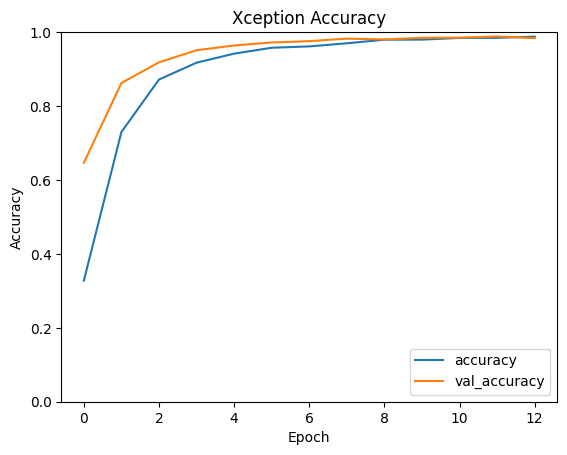

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saved Xception model to saved_models/Xception_saved.h5


In [23]:
# Set parameters for Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
input_shape = (299, 299, 3)
model_name = 'Xception'
# num_classes = 10   Replace with actual number of classes in your dataset
print (num_classes)

# Create the model
model = create_model(base_model, input_shape, num_classes)

# Training the model
epochs = 13
optimizer = optimizers.Adam()

# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print(f'Training {model_name}...')
history = train_and_evaluate(model, train_generator, validation_generator, model_name, epochs=epochs)

# Save the trained model
model.save(os.path.join(save_dir, f'{model_name}_saved.h5'))
print(f'Saved {model_name} model to {save_dir}/{model_name}_saved.h5')

# Testing and Labeling Unseen data
**Description:-**
- **Load Test Data:** Read the test dataset from a CSV file containing image paths.
- **Prepare Class Indices:** Invert class indices from the training generator to map numerical labels back to their class names.
- **Set Directory and Parameters:**
  - Define the directory containing saved models.
  - Set the batch size for processing images.
- **Define Batch Processing Function:**
  - Create a function to process images in batches:
    - Calculate the number of batches based on total images and batch size.
    - Load and preprocess images in each batch.
    - Make predictions using the model.
    - Collect predictions for all images.
- **Iterate Over Model Files:** Loop through each saved model file in the directory:
   - Load the model.
   - Set the target image size based on the model type.
   - Use the batch processing function to make predictions on test images.
   - Map numerical predictions back to class labels.
   - Create a DataFrame to store image paths and their predicted labels.
   - Save the predictions to a new CSV file.
- **Output Predictions:** Print a message indicating where the predictions CSV file is saved.


In [27]:
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.preprocessing import image

# Load test dataset
test_df = pd.read_csv('/content/traffic_sign_dataset/traffic_Data/test_data.csv')

# Load class indices (assuming you have train_generator with class indices saved)
class_indices_inverse = {v: k for k, v in train_generator.class_indices.items()}

# Directory containing the saved models
model_dir = '/content/saved_models'

# Define batch size
batch_size = 32

# Function to process images in batches
def process_images_in_batches(image_paths, model, target_size, batch_size):
    num_images = len(image_paths)
    num_batches = (num_images + batch_size - 1) // batch_size  # Calculate number of batches

    all_predictions = []

    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = min((batch_idx + 1) * batch_size, num_images)
        batch_paths = image_paths[start_idx:end_idx]

        batch_images = []
        for img_path in batch_paths:
            img = image.load_img(img_path, target_size=target_size)
            img = image.img_to_array(img)
            img = img / 255.0
            batch_images.append(img)

        batch_images = np.array(batch_images)
        batch_predictions_probs = model.predict(batch_images)
        batch_predictions = np.argmax(batch_predictions_probs, axis=1)

        all_predictions.extend(batch_predictions)

    return all_predictions

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Load the model
        model_path = os.path.join(model_dir, model_file)
        model = load_model(model_path)

        # Determine target size based on model
        if "Xception_saved" in model_file:
            target_size = (299, 299)
        else:
            target_size = (224, 224)

        # Process images in batches and make predictions
        image_paths = test_df['Image_Path'].tolist()
        prediction = process_images_in_batches(image_paths, model, target_size, batch_size)

        # Map predictions to class labels
        prediction_labels = [class_indices_inverse[label] for label in prediction]

        # Create a DataFrame with predictions
        predicted_df = pd.DataFrame({
            'Image_Path': test_df['Image_Path'],
            'Label': prediction_labels,
        })

        # Save predictions to CSV
        csv_path = f'/content/saved_models/predicted_{model_file.split(".")[0]}.csv'
        predicted_df.to_csv(csv_path, header=True, index=False)

        print(f"Predictions saved to {csv_path}")

1/1 [==============================] - 4s 4s/step
Predictions saved to /content/saved_models/predicted_Xception_saved.csv


# image label and prediction and visualization
 **Description :-**
- **Define Filenames:** List image paths to be used for predictions.
- **Load Labels Mapping:** Create a function to read a CSV file and map class IDs to class names.
- **Load Predicted Labels:** Create a function to read predictions from a CSV file and store them in a dictionary.
- **Predict and Display Images:** Create a function to:
  - Load and preprocess each image.
  - Retrieve the predicted label from the dictionary.
  - Display the image with the predicted label.
- **Set Paths:**
  - Define the path to the labels CSV file.
  - Load the class ID to class name mapping using the defined function.
- **Iterate Over Saved Models:**
   - Loop through each saved model in a directory.
   - Extract the model name.
   - Load the predicted labels using the defined function.
   - Use the prediction function to display images with predicted labels.

Predictions using model: Xception_saved


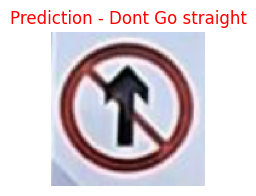

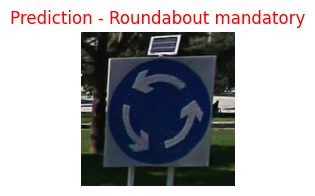

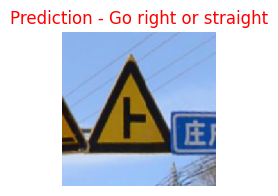

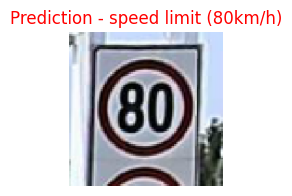

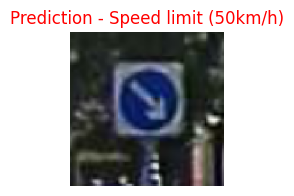

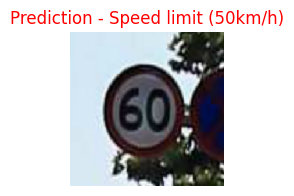

In [28]:
import csv
import os
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Example usage
filenames = [
    '/content/traffic_sign_dataset/traffic_Data/TEST/010_0012_j.png',
    '/content/traffic_sign_dataset/traffic_Data/TEST/027_1_0011_1_j.png',
    '/content/traffic_sign_dataset/traffic_Data/TEST/043_1_0025_1_j.png',
    '/content/traffic_sign_dataset/traffic_Data/TEST/007_0010_j.png',
    '/content/traffic_sign_dataset/traffic_Data/TEST/026_0036_j.png',
    '/content/traffic_sign_dataset/traffic_Data/TEST/005_1_0008_1_j.png'
]

def load_labels_mapping(labels_csv_path):
    classid_to_name = {}
    with open(labels_csv_path, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            classid_to_name[row['ClassId']] = row['Name']
    return classid_to_name

def load_predicted_labels(model_name):
    predicted_labels = {}
    csv_file = f'/content/saved_models/predicted_{model_name}.csv'  # CSV file format
    with open(csv_file, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            predicted_labels[row['Image_Path']] = row['Label']
    return predicted_labels

def predict_image(filenames, predicted_labels, classid_to_name):
    for filename in filenames:
        img = image.load_img(filename, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_processed = img_array / 255.0  # Normalize the image

        # Check if the filename is in predicted_labels
        if filename in predicted_labels:
            predicted_class_id = predicted_labels[filename]
            predicted_class_name = classid_to_name.get(predicted_class_id, "Unknown")
        else:
            print("Filename not found :-")
            print(filename)
            predicted_class_name = "Unknown"  # Handle cases where filename not found

        plt.figure(figsize=(2, 2))
        plt.imshow(img_processed)  # Display the processed image
        plt.title(f"Prediction - {predicted_class_name}", size=12, color='red')
        plt.axis('off')  # Hide axes
        plt.show()

# Path to labels.csv
labels_csv_path = '/content/traffic_sign_dataset/labels.csv'

# Load the labels mapping
classid_to_name = load_labels_mapping(labels_csv_path)

# Directory containing the saved models and predicted CSV files
model_dir = '/content/saved_models'

# Iterate over each model file in the directory
for model_file in os.listdir(model_dir):
    if model_file.endswith('.h5'):
        # Determine the model name
        model_name = model_file.split('.')[0]

        # Load predicted labels from CSV file
        predicted_labels = load_predicted_labels(model_name)

        # Predict and plot images using predicted labels
        print(f"Predictions using model: {model_name}")
        predict_image(filenames, predicted_labels, classid_to_name)
